In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("dataset/f1_dnf.csv")
df_dnf=pd.read_csv("dataset/df_dnf.csv")
df_finish=pd.read_csv("dataset/df_finish.csv")

In [4]:
df

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1128,70,2006,18,22,12,0.0,70.0,\N,62,...,interlagos,18,Red Bull,São Paulo,Brazil,-23.7036,-46.69970,785,2006-10-22,0
9996,793,55,2006,3,16,7,2.0,57.0,5719770,32,...,albert_park,1,Honda,Melbourne,Australia,-37.8497,144.96800,10,2006-04-02,1
9997,23131,957,2016,10,16,17,0.0,49.0,\N,43,...,silverstone,9,Renault,Silverstone,UK,52.0786,-1.01694,153,2016-07-10,0
9998,12102,501,1980,4,0,25,0.0,0.0,NaN,\N,...,long_beach,43,Shadow,California,USA,33.7651,-118.18900,12,1980-03-30,0


In [5]:
df.replace(r"\N", np.nan, inplace=True)

In [6]:
df.head(10)

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,NaN,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,NaN,NaN,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,NaN,NaN,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,NaN,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,NaN,NaN,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0
5,24317,1015,2019,6,5,14,0.0,77.0,NaN,61,...,monaco,6,Haas F1 Team,Monte-Carlo,Monaco,43.7347,7.42056,7,2019-05-26,0
6,14518,589,1975,14,5,18,NaN,9.0,NaN,NaN,...,watkins_glen,46,Parnelli,New York State,USA,42.3369,-76.92720,485,1975-10-05,0
7,21966,892,2013,12,16,13,NaN,53.0,4754232,53,...,monza,14,Sauber,Monza,Italy,45.6156,9.28111,162,2013-09-08,1
8,22656,932,2015,7,1,1,25.0,70.0,5513145,64,...,villeneuve,7,Mercedes,Montreal,Canada,45.5000,-73.52280,13,2015-06-07,1
9,18072,746,1960,1,2,6,1.0,79.0,NaN,NaN,...,galvez,25,Team Lotus,Buenos Aires,Argentina,-34.6943,-58.45930,8,1960-02-07,0


In [7]:
df_temp = df[['raceId','year','laps', 'fastestLapTime','fastestLapSpeed', 'milliseconds', 'target_finish']]
df_temp = df_temp[df_temp['target_finish'] == 0].sort_values(by='raceId', ascending=True)
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7105 entries, 8401 to 9821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           7105 non-null   int64  
 1   year             7105 non-null   int64  
 2   laps             6421 non-null   float64
 3   fastestLapTime   1506 non-null   object 
 4   fastestLapSpeed  1357 non-null   object 
 5   milliseconds     2 non-null      object 
 6   target_finish    7105 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 444.1+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     2607 non-null   object 
 9   fastestLap       3105 non-null   object 
 10  rank             3202 non-null   object 
 11  fastestLapTime   3105 non-null   object 
 12  fastestLapSpeed  2809 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  nationality_x

In [9]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


In [10]:
grid_above_20 = (df['grid'] > 20).sum()
position_above_26 = (df['positionOrder'] > 26).sum()

print("Grid positions > 20:", grid_above_20)
print("Position orders > 26:", position_above_26)

Grid positions > 20: 1152
Position orders > 26: 432


# Cleaning and Preprocessing

### Handling Missing Values

In [11]:
df_dropped=df.drop(columns=['rank', 'fastestLap'])

In [12]:
milli_col_actual_missing= df_dropped[(df_dropped['target_finish'] == 1) & (df_dropped['milliseconds'].isna())]
print(len(milli_col_actual_missing))
print(f"Percentof actual missing {(len(milli_col_actual_missing)/10000)*100}")

290
Percentof actual missing 2.9000000000000004


In [13]:
df_dropped.loc[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].isna()), 'milliseconds'] = 0

In [14]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     9710 non-null   object 
 9   fastestLapTime   3105 non-null   object 
 10  fastestLapSpeed  2809 non-null   object 
 11  driverRef        10000 non-null  object 
 12  surname          10000 non-null  object 
 13  forename         10000 non-null  object 
 14  dob              10000 non-null  object 
 15  nationality_x    10000 non-null  object 
 16  constructorRef   10000 non-null  object 
 17  name         

In [15]:
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapTime'].isna()), 'milliseconds'] = 0
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna()), 'milliseconds'] = 0

In [16]:
df_dropped['points'] = df_dropped.apply(
    lambda row: 0 if row['positionOrder'] > 10 else row['points'],
    axis=1
)

In [17]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9586 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     9710 non-null   object 
 9   fastestLapTime   3105 non-null   object 
 10  fastestLapSpeed  2809 non-null   object 
 11  driverRef        10000 non-null  object 
 12  surname          10000 non-null  object 
 13  forename         10000 non-null  object 
 14  dob              10000 non-null  object 
 15  nationality_x    10000 non-null  object 
 16  constructorRef   10000 non-null  object 
 17  name         

In [18]:
def lap_to_milliseconds(lap_str):
    try:
        minutes, seconds = lap_str.split(":")
        return int(minutes)*60000 + float(seconds)*1000
    except:
        return None

df_dropped['fastestLapTime_ms'] = df_dropped['fastestLapTime'].apply(lap_to_milliseconds)
df_dropped['fastestLapSpeed']=pd.to_numeric(df_dropped['fastestLapSpeed'], errors='coerce')

# Feature Analysis

## Relationships Between Features

In [19]:
df_not_finished= df[df['target_finish'] == 0]
df_finished= df[df['target_finish'] == 1]
df_not_finished = df_not_finished.reset_index(drop=True)
df_finished = df_finished.reset_index(drop=True)
print(df_not_finished.info())
print(df_finished.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         7105 non-null   int64  
 1   raceId           7105 non-null   int64  
 2   year             7105 non-null   int64  
 3   round            7105 non-null   int64  
 4   grid             7105 non-null   int64  
 5   positionOrder    7105 non-null   int64  
 6   points           6417 non-null   float64
 7   laps             6421 non-null   float64
 8   milliseconds     2 non-null      object 
 9   fastestLap       1506 non-null   object 
 10  rank             1590 non-null   object 
 11  fastestLapTime   1506 non-null   object 
 12  fastestLapSpeed  1357 non-null   object 
 13  driverRef        7105 non-null   object 
 14  surname          7105 non-null   object 
 15  forename         7105 non-null   object 
 16  dob              7105 non-null   object 
 17  nationality_x 

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         2895 non-null   int64  
 1   raceId           2895 non-null   int64  
 2   year             2895 non-null   int64  
 3   round            2895 non-null   int64  
 4   grid             2895 non-null   int64  
 5   positionOrder    2895 non-null   int64  
 6   points           2612 non-null   float64
 7   laps             2601 non-null   float64
 8   milliseconds     2605 non-null   object 
 9   fastestLap       1599 non-null   object 
 10  rank             1612 non-null   object 
 11  fastestLapTime   1599 non-null   object 
 12  fastestLapSpeed  1452 non-null   object 
 13  driverRef        2895 non-null   object 
 14  surname          2895 non-null   object 
 15  forename         2895 non-null   object 
 16  dob              2895 non-null   object 
 17  nationali

In [20]:
df_not_finished.head(10)

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,11565,483,1981,1,23,21,0.0,16.0,NaN,NaN,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
1,18661,772,1958,8,0,26,0.0,0.0,NaN,NaN,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
2,25121,1058,2021,8,19,16,0.0,69.0,NaN,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
3,8863,383,1988,12,0,30,0.0,0.0,NaN,NaN,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0
4,24317,1015,2019,6,5,14,0.0,77.0,NaN,61,...,monaco,6,Haas F1 Team,Monte-Carlo,Monaco,43.7347,7.42056,7,2019-05-26,0
5,14518,589,1975,14,5,18,NaN,9.0,NaN,NaN,...,watkins_glen,46,Parnelli,New York State,USA,42.3369,-76.92720,485,1975-10-05,0
6,18072,746,1960,1,2,6,1.0,79.0,NaN,NaN,...,galvez,25,Team Lotus,Buenos Aires,Argentina,-34.6943,-58.45930,8,1960-02-07,0
7,5100,255,1995,16,15,10,0.0,51.0,NaN,NaN,...,suzuka,22,Sauber,Suzuka,Japan,34.8431,136.54100,45,1995-10-29,0
8,8485,371,1989,16,0,31,0.0,0.0,NaN,NaN,...,adelaide,29,Onyx,Adelaide,Australia,-34.9272,138.61700,58,1989-11-05,0
9,6482,305,1991,1,14,10,0.0,75.0,NaN,NaN,...,phoenix,33,Jordan,Phoenix,USA,33.4479,-112.07500,345,1991-03-10,0


grid vs dnf

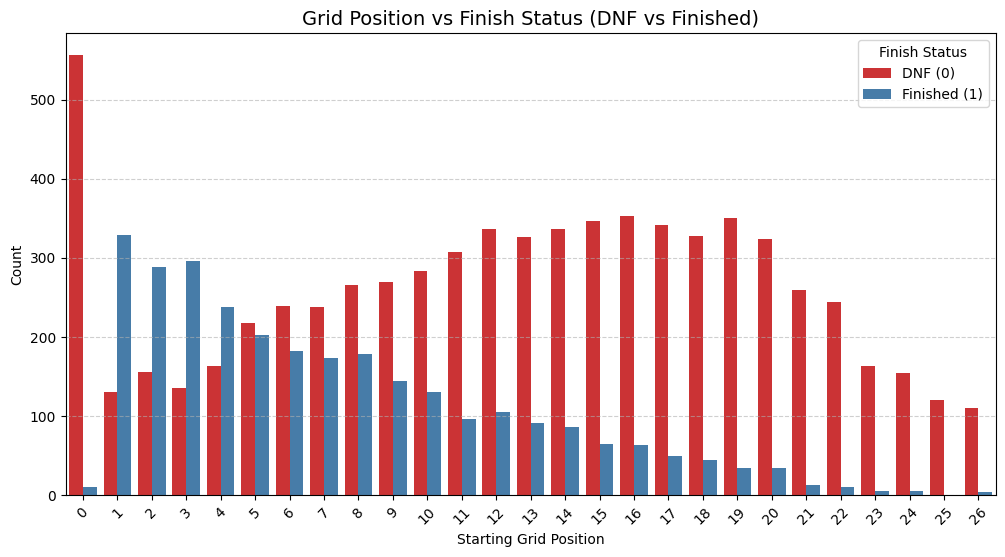

In [21]:
filtered_df = df[df['grid'] <= 26]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='grid', hue='target_finish', palette='Set1')

plt.title('Grid Position vs Finish Status (DNF vs Finished)', fontsize=14)
plt.xlabel('Starting Grid Position')
plt.ylabel('Count')
plt.legend(title='Finish Status', labels=['DNF (0)', 'Finished (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Axes: title={'center': 'Top 15 Drivers by Total DNFs'}, ylabel='driverRef'>

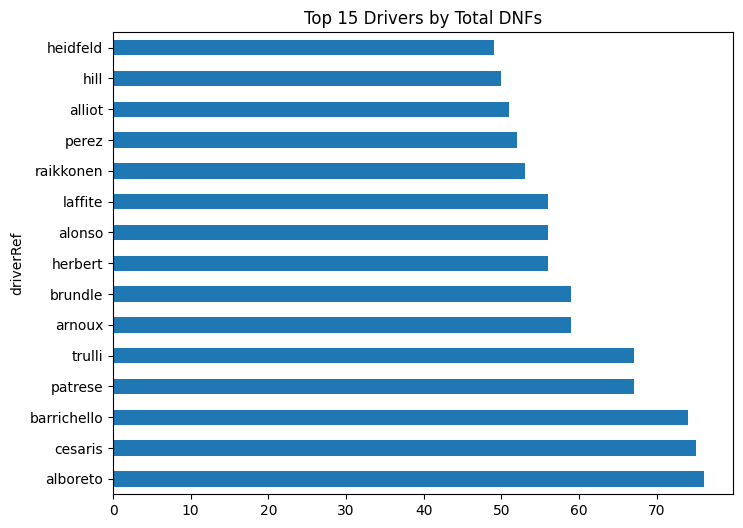

In [22]:
driver_dnf = df.groupby('driverRef')['target_finish'].apply(lambda x: (x == 0).sum()).sort_values(ascending=False).head(15)
driver_dnf.plot(kind='barh', figsize=(8,6), title='Top 15 Drivers by Total DNFs')


<Axes: title={'center': 'Top 10 Teams by DNF Rate'}, ylabel='constructorRef'>

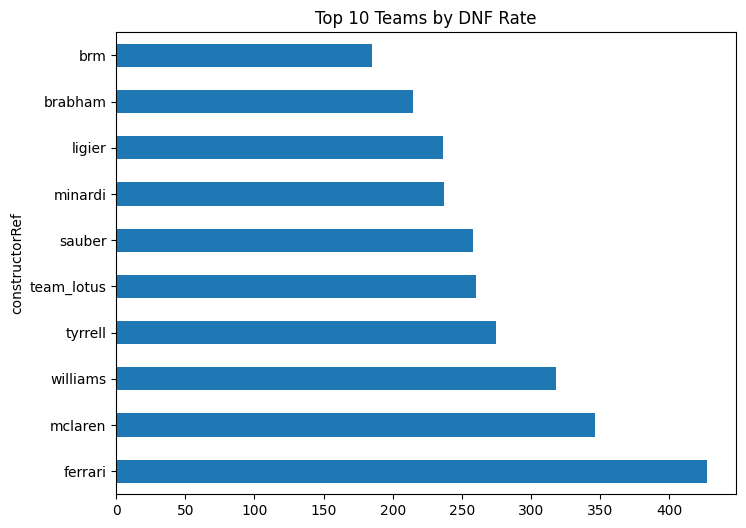

In [23]:
team_dnf = df.groupby('constructorRef')['target_finish'].apply(lambda x: (x==0).sum()).sort_values(ascending=False)
team_dnf.head(10).plot(kind='barh', figsize=(8,6), title='Top 10 Teams by DNF Rate')


<Axes: title={'center': 'Circuits with Highest DNF Rate'}, ylabel='circuitRef'>

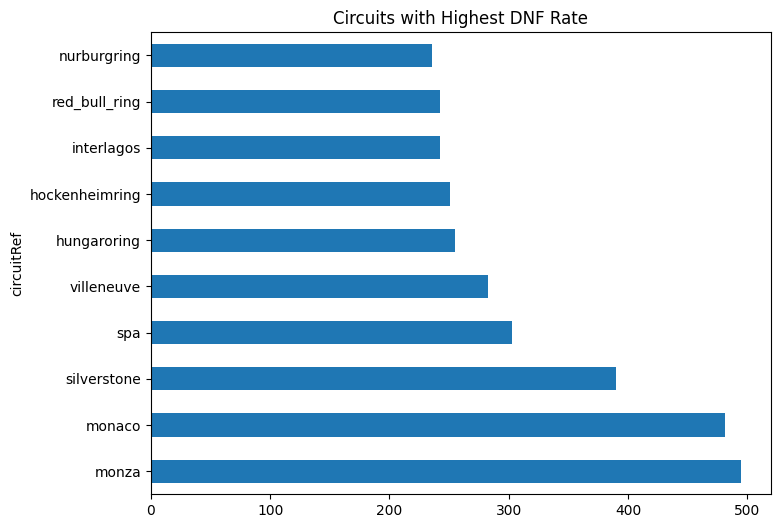

In [24]:
circuit_dnf = df.groupby('circuitRef')['target_finish'].apply(lambda x: (x==0).sum()).sort_values(ascending=False)
circuit_dnf.head(10).plot(kind='barh', figsize=(8,6), title='Circuits with Highest DNF Rate')


<Axes: >

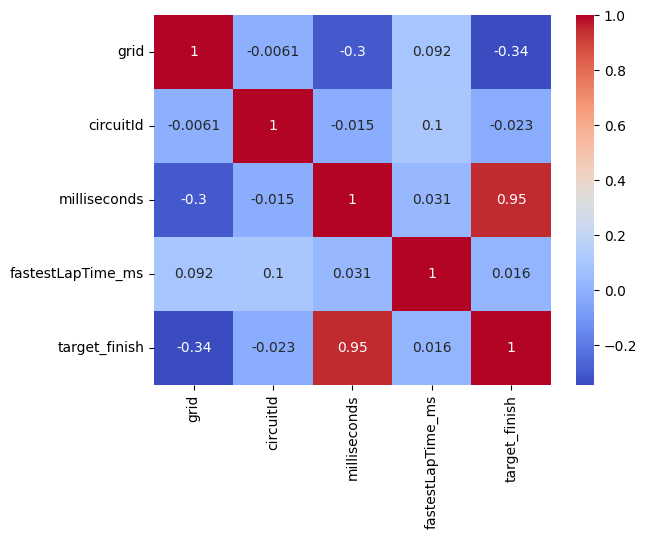

In [25]:
corr = df_dropped[['grid','circuitId','milliseconds','fastestLapTime_ms','target_finish']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
